<a href="https://www.kaggle.com/code/simrangupta220/mental-health-analysis?scriptVersionId=152979271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 17px;width: 1040px;border-radius: 25px;height: 56px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 29px;">Mental Health Analysis in Tech Survey: EDA and Feature Engineering</span> 
</div>

**It is to be noted that the interactive graphs might not appear due to technical error. However, you can try and test run them to understand the interpretations in a better way.**

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 350px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Importing Essential Libraries</span> 
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as pio
import matplotlib.colors as mcolors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets
from fuzzywuzzy import fuzz
import scipy as misc
from category_encoders.ordinal import OrdinalEncoder

In [3]:
import plotly

In [4]:
plotly.offline.init_notebook_mode (connected = True)

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 400px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Creating Customized Colour Palettes</span> 
</div>

In [5]:
palette = ['#87CEEB','#B0E0E6','#C1F8C1', '#C1F8D8', '#D8BFD8','#8D4C66', '#FFB6C1','#F0B2B2','#F8D8C1', '#FFFACD', '#D2B48C','#d6b39f', '#c48d86', '#ad6b75']
palette1 = ['#8D4C66', '#AD6B75','#FFB6C1','#F0B2B2', '#C1F8D8', '#D8BFD8','#E0B0FF','#FFB6C1','#F0B2B2','#F8D8C1', '#FFFACD', '#D2B48C','#d6b39f', '#c48d86']

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 200px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Data Loading</span> 
</div>

In [6]:
df=pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
df.head(10).style.applymap(lambda x : "background-color: #C1F8D8")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,nan,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,nan
1,2014-08-27 11:29:37,44,M,United States,IN,nan,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,nan
2,2014-08-27 11:29:44,32,Male,Canada,nan,nan,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,nan
3,2014-08-27 11:29:46,31,Male,United Kingdom,nan,nan,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,nan
4,2014-08-27 11:30:22,31,Male,United States,TX,nan,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,nan
5,2014-08-27 11:31:22,33,Male,United States,TN,nan,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,nan
6,2014-08-27 11:31:50,35,Female,United States,MI,nan,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,nan
7,2014-08-27 11:32:05,39,M,Canada,nan,nan,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,nan
8,2014-08-27 11:32:39,42,Female,United States,IL,nan,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,nan
9,2014-08-27 11:32:43,23,Male,Canada,nan,nan,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,nan


<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 300px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Understanding the Data</span> 
</div>

| Column | Description |
| :---- | :--- |
|   Timestamp  |   Timestamp when the respond was taken   |
|   Age  |   Age of the respondent   |
|   Gender  |   Gender of the respondent   |
|   Country  |   Where the respondent resides   |
|   State  |   State of the country   |
|   self_employed  |   Whether the respondent is self employed or not   |
|   family_history  |   Whether the respondent  has family history of mental illness  |
|   treatment  |   Whether the respondent has ever sought a treatment of mental health condition   |
|   work_interfere  |   Does the respondent's mental condition interferes in their work   |
|   no_employees  |   number of employees respondent's organizations has   |
|   remote_work  |   does the respondent work remotely   |
|   tech_company  |   does the respondent work in a tech company or not   |
|   benefits  |   does the respondent receives any mental health benefits from organization   |
|   care_options  |   Is the respondent aware about the mental care options provided by their organization   |
|   wellness_program  |   Did the organization ever discussed about mental health wellness program   |
|   seek_help  |   Does the organization provides resources to seek help for mental care   |
|   anonymity  |   Does the anonymity of the respondent get protected when he take up any resource for mental care   |
|   leave  |   Is it easy for the respondent to take leave for mental health illness   |
|   mental_health_consequence  |   Does discussing mental health issue with the organization lead to any consequence   |
|   physical_health_consequence  |   Does discussing physical health issue with the organization lead to any consequence  |
|   coworkers  |   Whether the respondent is comfortable discussing mental health issue with coworker   |
|   supervisor  |   Whether the respondent is comfortable discussing mental health issue with supervisor   |
|   mental_health_interview  |   Is mental health issue a topic which the respondent would bring up in the interview   |
|   phys_health_interview  |   Is physical health issue a topic which the respondent would bring up in the interview   |
|   mental_vs_physical	  |   Does the respondent's organization takes mental health as serious as physical health   |
|   obs_consequence  |   Has the respondent ever heard of or observed negative consequences for coworkers with mental health conditions in your workplace?   |
|   comments  |   Additional comments   |

In [7]:
print(f'DataTypes in given dataset: \n{df.dtypes}')

DataTypes in given dataset: 
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 250px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Descriptive Statistics</span> 
</div>

In [8]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['state'].loc[df['treatment'] == 'Yes'].value_counts().index.to_list()[:10], values=df['state'].loc[df['treatment'] == 'Yes'].value_counts()[:10], name="Treatment - Yes", marker=dict(colors=palette)),
              1, 1)
fig.add_trace(go.Pie(labels=df['state'].loc[df['treatment'] == 'No'].value_counts().index.to_list()[:10], values=df['state'].loc[df['treatment'] == 'No'].value_counts()[:10], name="Treatment - No", marker=dict(colors=palette)),
              1, 2)

fig.update_traces(hole=0.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="State and Treatment",
    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

| Abbreviation | Country |
| :---- | :--- |
|   CA  |   California   |
|   WA  |   Washington   |
|   NY  |   New York   |
|   TX  |   Texas   |
|   IL  |   Illinois   |
|   OH  |   Ohio   |
|   TN  |   Tennessee   |
|   OR  |   Oregon   |
|   PA  |   Pennsylvania   |
|   IN  |   Indiana   |
|   MI  |   Michigan   |
|   MA  |   Massachusetts   |

*It can be interpreted from the above visualization that majority of the respondents who have sought treatment for mental health are from California followed by Washington, New York and Texas while majority of respondents who have not sought treatment are also from California followed by Washington, Tennessee and Texas. This also implies that majority of the respondents are from California.*

**Dropping three variables 'state', 'comments' and 'Timestamp' :**

In [9]:
df = df.drop(columns=['state','comments', 'Timestamp'])
print('\033[1m' + 'Columns in updated Dataframe :' + '\033[0m', len(df.columns))

Columns in updated Dataframe : 24


**In order to fill the missing values in 'self_employed' and 'work_interfere' with 'Yes','No' and 'Sometimes','Never','Rarely','Often' respectively with respective probability distributions as mentioned in the code below:**

In [10]:
df['self_employed'] = df['self_employed']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(df))))

df['work_interfere'] = df['work_interfere']\
                      .fillna(pd.Series(np.random.choice(['Sometimes', 'Never', 'Rarely', 'Often']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(df))))
print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , df.isnull().sum().sum())

Total empty values in the Dataset : 0


In [11]:
df_encoding = df
encoder = OrdinalEncoder()
df_encoding = encoder.fit_transform(df.drop(['Age'], axis=1))

*Converting all the categorical variables into numeric using 'OriginalEncoder', dropping the age column.*

**Now let's look at the new data frame df_encoding:**

In [12]:
df_encoding['Age'] = df.Age
df_encoding.head(10).style.applymap(lambda x : "background-color: #C1F8D8")

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,37
1,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,1,2,2,1,44
2,3,2,1,1,2,2,1,1,1,3,2,1,3,2,3,1,1,3,1,2,3,3,1,32
3,3,3,1,2,1,1,3,1,1,3,3,1,3,3,3,3,2,1,2,3,1,3,2,31
4,3,1,2,1,2,3,4,2,1,1,2,2,2,2,2,1,1,1,1,2,3,2,1,31
5,3,1,1,2,2,4,1,1,1,1,1,1,2,2,2,1,1,3,1,1,1,2,1,33
6,1,1,2,2,1,4,5,2,1,3,2,1,3,3,3,2,3,1,2,1,2,2,1,35
7,2,2,1,1,2,3,5,2,1,3,3,1,3,1,2,1,1,2,2,1,2,3,1,39
8,1,1,1,2,1,4,4,1,1,1,3,1,3,3,4,2,1,3,1,1,1,3,1,42
9,3,2,2,1,2,3,3,1,1,2,2,2,2,2,2,1,1,3,1,3,1,1,1,23


**Now we will check for correlation in df_encoding data frame i.e. after assigning numerical values to all the categorical variables, using a heatmap.
<br>Darker shades represent higher correlation.**

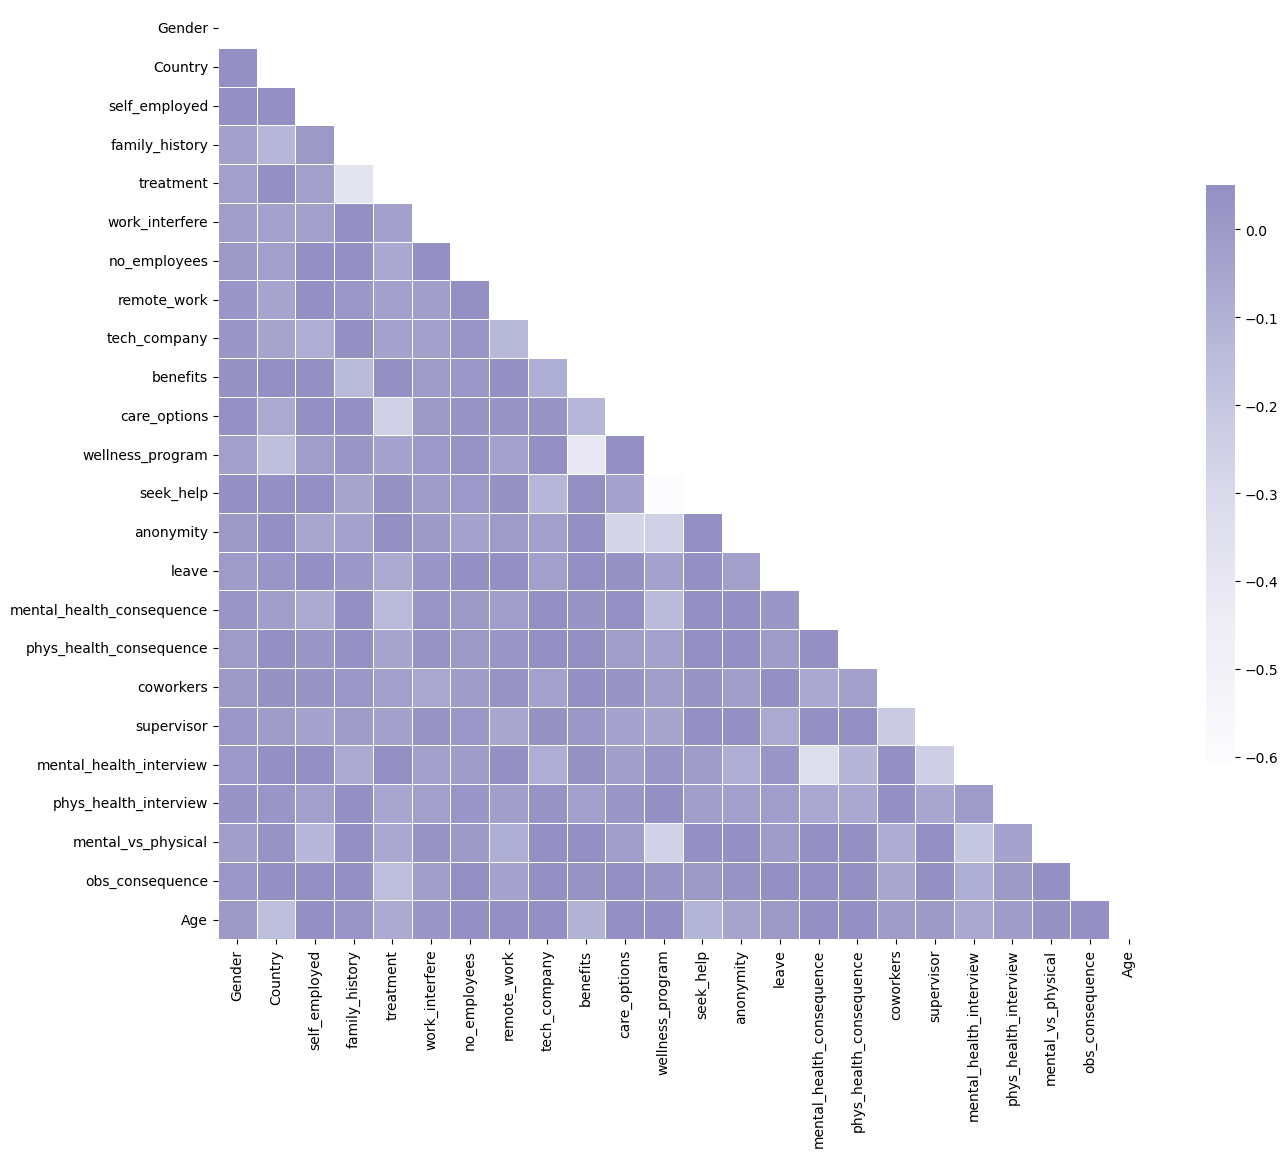

In [13]:
corr = df_encoding.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 5, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.05, center=0,square=True, linewidths=.4, cbar_kws={"shrink": .5})
plt.show()

In [14]:
cmap = mcolors.ListedColormap('#C1F8D8')

**In order to know the count of distribution of gender amongst the respondents we will run the following code:**

In [15]:
gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
table_gender = gender_values.style.background_gradient(cmap=cmap)
table_gender

,count
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4
Male,3


In [16]:
def winsorization_outliers(df):
    out=[]
    for i in df:
        q1 = np.percentile(df , 1)
        q3 = np.percentile(df , 99)
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
    return out
outliers = winsorization_outliers(df.Age)
data_age = df.loc[~df.Age.isin(outliers)]
fig = px.violin(data_age, y="Age", x="treatment", color="Gender", box=True, points="all", color_discrete_sequence=palette)
fig.show()

Outliers: [18, 18, 18, -29, 18, 18, 60, 329, 99999999999, 57, 58, 57, 18, 18, 62, 65, 57, -1726, 5, 61, 8, 11, -1, 72, 60]


*The above code initially identifies outliers in the age column by performing winsorization preprocessing technique, removes them from the data frame and then generates a violin plot to understand the distribution of age across different gender. However it is visible that cleaning of the gender column is required in order to make useful interpretation out of it.*

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 350px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Cleaning the Gender Column</span> 
</div>

In [17]:
age = []
for i in df.Age:
    if (i<18) or (i>99):
        age.append(31)
    else:
        age.append(i)
df['Age'] = age

other  = ['A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']
male   = ['male', 'Maleleaning androgynous', 'cis Male','something kinda Male?', 'Male(CIS)','ostensibly Male, unsure what that really means','cis Male','Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'Female(cis)','Trans-Female','cis-Female/femme','Trans Female','Female(trans)', 'Female(cis)''female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']

df['Gender'].replace(to_replace = other, value = 'other', inplace=True)
df['Gender'].replace(to_replace = male, value = 'M', inplace=True)
df['Gender'].replace(to_replace = female, value = 'F', inplace=True)

print('\033[1m' + 'Unique values in updated Gender column :' + '\033[0m', df.Gender.unique())
print('\033[1m' + 'Range of column Age (Before) :' + '\033[0m', (df.Age.min(), df.Age.max()))
print('\033[1m' + 'Range of column Age :' + '\033[0m', (df.Age.min(), df.Age.max()))

Unique values in updated Gender column : ['F' 'M' 'other']
Range of column Age (Before) : (18, 72)
Range of column Age : (18, 72)


In [18]:
prop = pd.DataFrame(df.Gender.value_counts(normalize=True))
prop.style.applymap(lambda x : "background-color: #C1F8D8")

,Gender
M,0.787133
F,0.196187
other,0.016680


  *Majority of the respondents are Male.*

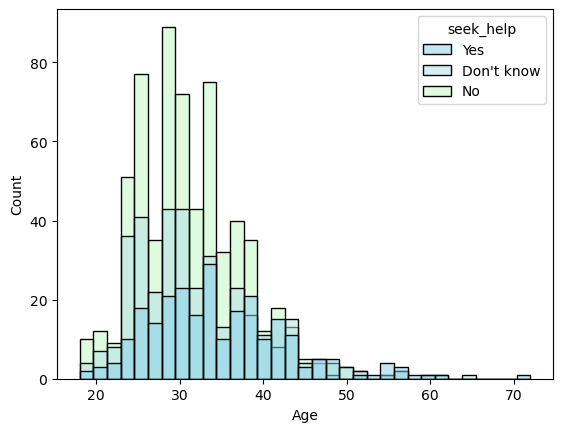

In [19]:
a= sns.histplot(df,x='Age',hue='seek_help', palette=palette)

*Above graph displays that every respondent's organization does not provide resource for seeking help for mental health issues irrespective of the age of the respondent as in all the bars variable 'No' for 'seek_help' variable has the highest count.*

**Dropping of two variables named 'Age' and 'Country' because we want to see the distribution of all other categorical variables present in the data frame**

In [20]:
df_ = df.drop(['Age', 'Country'], axis=1)

In [21]:
buttons = []
i = 0
vis = [False] * 24

for col in df_.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 24

fig = go.Figure()
for col in df_.columns:
    fig.add_trace(go.Pie(
             values = df_[col].value_counts(),
             labels = df_[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',))
fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette1).as_hex(),
                              line=dict(color='#000000', width=1)))
              
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])
for i in range(1,22):
    fig.data[i].visible = False
fig.show()

*The above interactive graph shows multiple pie charts, each representing the distribution of a separate column in the data frame* 

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 260px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Gender-wise Analysis</span> 
</div>

In [22]:
male   = df[df.Gender == 'M'].drop(['Gender', 'Age', 'Country'], axis=1)
female = df[df.Gender == 'F'].drop(['Gender', 'Age', 'Country'], axis=1)
other  = df[df.Gender == 'other'].drop(['Gender', 'Age', 'Country'], axis=1)

In [23]:
buttons = []
i = 0
vis = [False] * 21
for col in male.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in male.columns:
    fig.add_trace(go.Pie(
             values = male[col].value_counts(),
             labels = male[col].value_counts().index,
             title = dict(text = 'Male distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),1,1)
for col in female.columns:
    fig.add_trace(go.Pie(
             values = female[col].value_counts(),
             labels = female[col].value_counts().index,
             title = dict(text = 'Female distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),1,2)
fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=14,
                  opacity = 0.7,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette1).as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.7,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette).as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'Times New Roman',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.62,
                        y = 0.91,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1, yref = "paper", align = "left")])
for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True
fig.show()

*The above graph draws a visual comparison of distributions corresponding to different variables between males and females using interactive selection through the dropdown menu*

**Plotting of top 15 countries which have highest number of male and female respondents in the given data frame:**

In [24]:
male_country   = df[df['Gender'] == 'M'][['Country', 'Gender']]
female_country = df[df['Gender'] == 'F'][['Country', 'Gender']]
male_country   = male_country.value_counts()
female_country = female_country.value_counts()

male_country   = pd.DataFrame(male_country).reset_index().rename(columns={0:'count'}).head(15)
female_country = pd.DataFrame(female_country).reset_index().rename(columns={0:'count'}).head(15)
male_country['count'] = male_country['count'] * -1

In [25]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{}, {}]],
                    shared_yaxes=True,
                    horizontal_spacing=0)

fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = male_country['count'],
                 text = male_country['count'],
                 textfont = dict(size = 10, color = 'black'),
                 textposition = 'outside',
                 name = 'Male responses',
                 marker_color="#F9A825",
                 orientation = 'h'),
                 row=1, col=1)
fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = female_country['count'],
                 text = female_country['count'],
                 textfont = dict(size = 10, color = 'black'),
                 textposition = 'outside',
                 name = 'Female responses',
                 marker_color="#5A9BD5",
                 orientation = 'h'),
                 row=1, col=2)
fig.update_xaxes(
        tickfont = dict(size=15),
        tickmode = 'array',
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')
fig.update_yaxes(showgrid=False,
                 categoryorder='total ascending',
                 ticksuffix=' ',
                 showline=False)
fig.update_layout(
                  font_family   = 'Times New Roman',
                  title         = dict(text = 'Gender of the survey respondents across Countries', x = 0.525),
                  margin        = dict(t=80, b=0, l=70, r=40),
                  hovermode     = "y unified",
                  plot_bgcolor  = "#E8DCE7",
                  paper_bgcolor = "#C5B3C5",
                  font          = dict(color='black'),
                  legend        = dict(orientation="h",
                                       yanchor="bottom", y=1,
                                       xanchor="center", x=0.5),
                  hoverlabel    = dict(bgcolor="#FFFFCC", font_size=13, 
                                      font_family="Times New Roman"))
fig.show()

*It is visible from the above graph that male respondents are higher in almost all the nations than female respondents in the given data frame.*

<div style="background-color: #d6b39f; border: 2px solid #c48d86; padding: 10px;width: 260px;border-radius: 20px;height: 50px;">
    <span style="color: #F8F8F8;font-family: Times New Roman;font-size: 25px;">Country-wise Analysis</span> 
</div>

In [26]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.Country.loc[df.treatment == 'Yes'].value_counts().index.to_list()[:10], values = df.Country.loc[df.treatment == 'Yes'].value_counts()[:10], name="Treatment -Yes", marker=dict(colors=palette)),
              1, 1)
fig.add_trace(go.Pie(labels=df.Country.loc[df.treatment == 'No'].value_counts().index.to_list()[:10], values = df.Country.loc[df.treatment == 'No'].value_counts()[:10], name="Treatment - No", marker=dict(colors=palette)),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Country-treatment Analysis",
   
    annotations=[dict(text='Yes', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='No', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()

*The above visualization compares the distribution of 'treatment' variable amongst different countries in the data set. It can be interpreted that amongst all the countries, U.S. has highest level of respondents who have sought treatment for mental health illness followed by U.K., Canada,Germany, Ireland and so on. On the other hand, majority of people who have not sought a mental health treatment are also from U.S., followed by U.K.,Canada, Germany, Netherlands and so on.*

**Since majority of the respondents are from U.S., U.K., Canada and Germany so let us analyse data of these four countries deeply. For this we will first create four separate subsets of the data frame corresponding to the four countries by dropping 'age' and 'country' variables from the original data frame.**

In [27]:
us = df[df.Country == 'United States'].drop(['Age', 'Country'], axis=1)
uk = df[df.Country == 'United Kingdom'].drop(['Age', 'Country'], axis=1)
cd = df[df.Country == 'Canada'].drop(['Age', 'Country'], axis=1)
gr = df[df.Country == 'Germany'].drop(['Age', 'Country'], axis=1)

In [28]:
buttons = []
i = 0
vis = [False] * 22
for col in us.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 22
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    vertical_spacing = 0.07)
for col in us.columns:
    fig.add_trace(go.Pie(
             values = us[col].value_counts(),
             labels = us[col].value_counts().index,
             title = dict(text = 'U.S. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),1,1)   
for col in uk.columns:
    fig.add_trace(go.Pie(
             values = uk[col].value_counts(),
             labels = uk[col].value_counts().index,
             title = dict(text = 'U.K. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),1,2)
for col in cd.columns:
    fig.add_trace(go.Pie(
             values = cd[col].value_counts(),
             labels = cd[col].value_counts().index,
             title = dict(text = 'Canada distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),2,1)    
for col in gr.columns:
    fig.add_trace(go.Pie(
             values = gr[col].value_counts(),
             labels = gr[col].value_counts().index,
             title = dict(text = 'Germany distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'Times New Roman'),
                          ),
             hole = 0.4,
             hoverinfo='label+percent',),2,2)
fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette).as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_traces(row=2, col=1, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette1).as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_traces(row=2, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette(palette1).as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                   paper_bgcolor = "#E8DCE7",
                  height = 1200,
                  font_family   = 'Times New Roman',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 0.96,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.48, y = 1, yref = "paper", align = "right")])
for i in range(0,88):
    fig.data[i].visible = False
fig.data[0].visible = True
fig.data[22].visible = True
fig.data[44].visible = True
fig.data[66].visible = True
fig.show()

*Viewer can easily interpret and analyse the distribution of all the variables from the above shown interactive visualization amongst these four countries from which the data frame has highest number of respondents.*